## DSA HomeWork - Use Case : Titanic
- Authorized by : Shelby Marsa
- Date          : 11 November 2019

### 1. Import Library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### 2. Read Data Set

In [23]:
df = pd.read_csv ('csv/titanic/train.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check Data Set

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
#Check numbers of missing value

count_missing = df.isnull().sum()
missing = count_missing[count_missing>0]
missing

Age         177
Cabin       687
Embarked      2
dtype: int64

In [26]:
most_missing=missing[missing>df.shape[0]*0.6]
print('Column with more than 60% data is missing is column',most_missing)

Column with more than 60% data is missing is column Cabin    687
dtype: int64


In [27]:
#Drop column with most missing values
df = df.drop(['Cabin'], axis=1 )
print(df.shape)
df.head()

(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 4. Visualize Data Distribution

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 4.1 Distributions of Passengers Survived and Not Survived

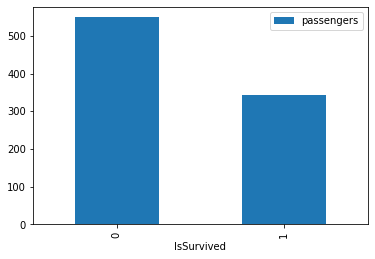

In [30]:
survived = df.Survived.value_counts().reset_index(name='passengers')
survived = survived.rename(columns={'index':'IsSurvived'})
survived.plot.bar(x='IsSurvived', y='passengers')

#### 4.2 Passengers Mostly Survived based on Gender & Pclass

In [32]:
survive_gender = df.groupby(['Sex', 'Survived'])['PassengerId']\
.nunique().reset_index(name='unique_pass')
survive_gender

,Sex,Survived,unique_pass
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [33]:
survive_partner = df.groupby(['Pclass', 'Survived'])['PassengerId'].nunique().reset_index(name='unique_pass')
survive_partner

,Pclass,Survived,unique_pass
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [36]:
pclass = df.groupby('Pclass')['PassengerId'].nunique().reset_index(name = 'total_pass')
survive = survive_partner.merge(pclass, how = 'inner', on = 'Pclass')
survive['percentage'] = survive['unique_pass']*100.0/survive['total_pass']
survive

,Pclass,Survived,unique_pass,total_pass,percentage
0,1,0,80,216,37.037037
1,1,1,136,216,62.962963
2,2,0,97,184,52.717391
3,2,1,87,184,47.282609
4,3,0,372,491,75.763747
5,3,1,119,491,24.236253


#### 4.3 Distributions between Fare and Age

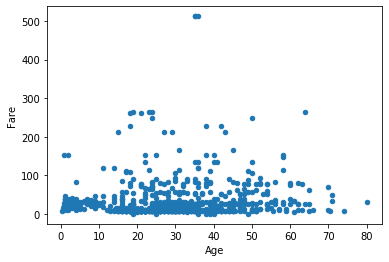

In [39]:
df.plot.scatter(x = 'Age', y='Fare')

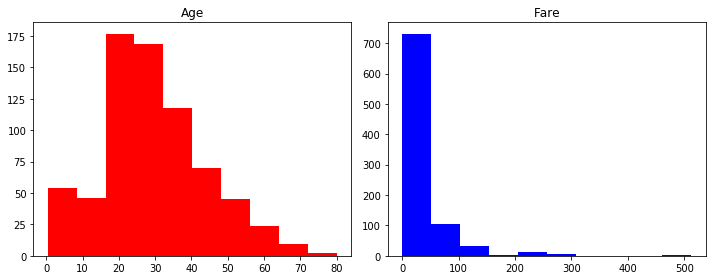

In [42]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.hist(df['Age'], color='red')
plt.title('Age')

plt.subplot(1,2,2)
plt.hist(df['Fare'], color='blue')
plt.title('Fare')

plt.tight_layout()
plt.show()